In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [ ]:
raw_data = pd.read_csv("glass.csv")
raw_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
raw_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
raw_data.duplicated().sum()

1

In [ ]:
raw_data = raw_data.drop_duplicates()
raw_data.shape

(213, 10)

In [ ]:
raw_data['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
raw_data.corr().style.background_gradient(cmap='coolwarm')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


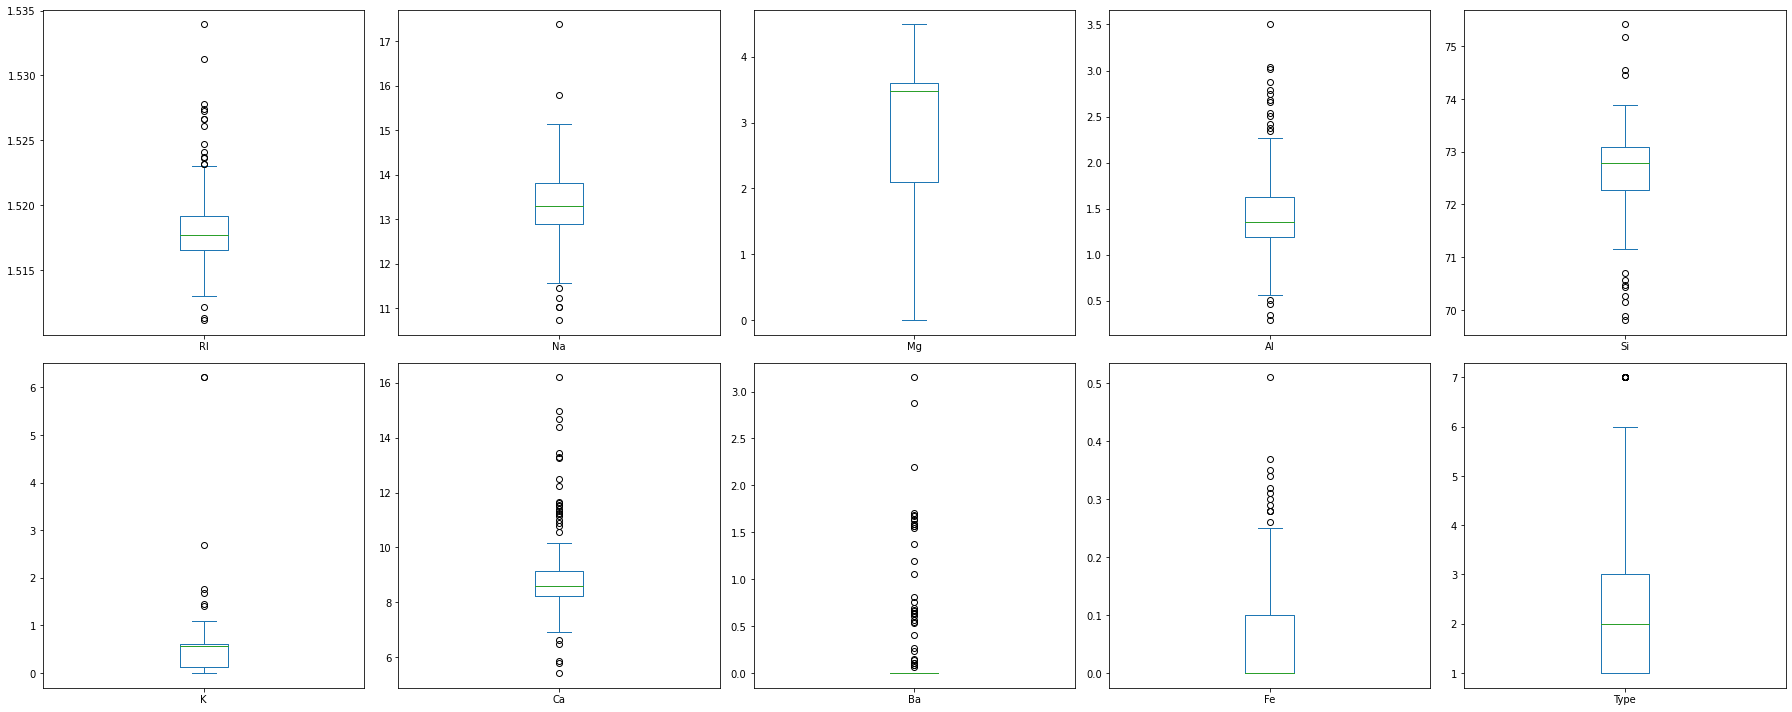

In [ ]:
raw_data.plot(kind='box',subplots=True,layout=(2,5),figsize=(25,10))
plt.tight_layout()

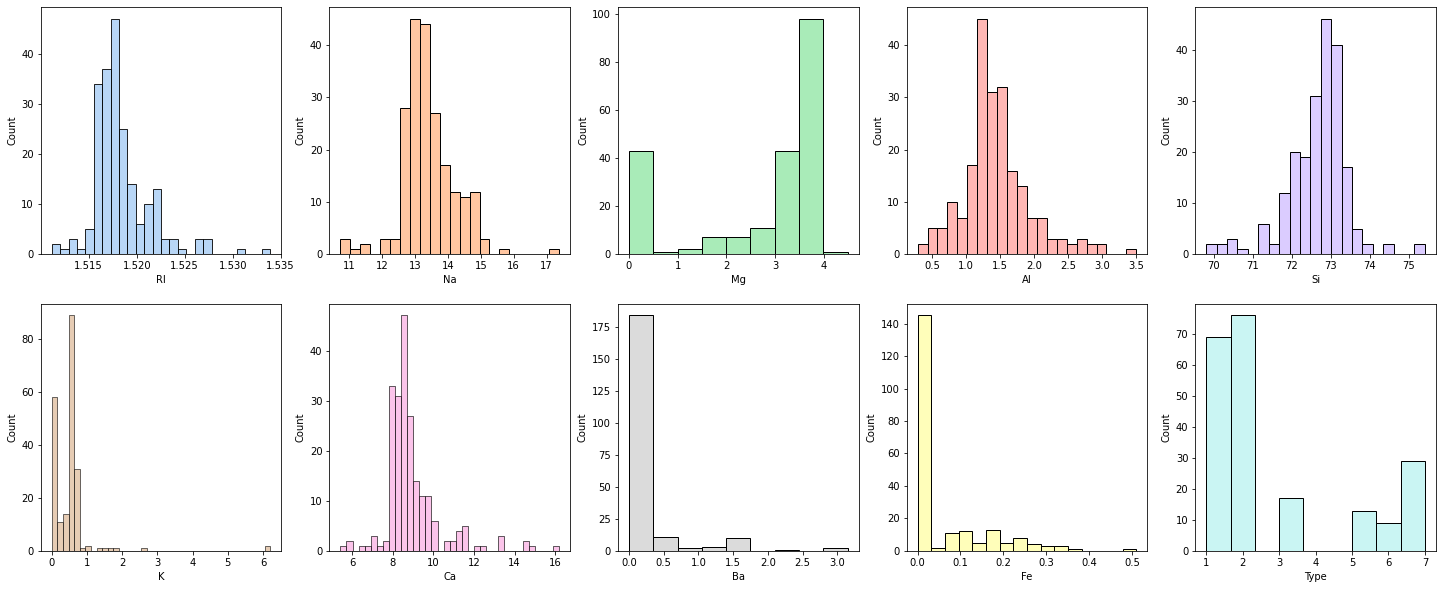

In [ ]:
color_palette = sns.color_palette("pastel") + sns.color_palette("Set2") + sns.color_palette("husl", 25)
fig, axes = plt.subplots(2, 5,figsize=(25,10))
axe = axes.flatten()

for i,feature in enumerate(raw_data.columns):
     sns.histplot(data=raw_data, x=feature, ax=axe[i], color=color_palette[i])  
plt.show()

<Figure size 576x576 with 0 Axes>

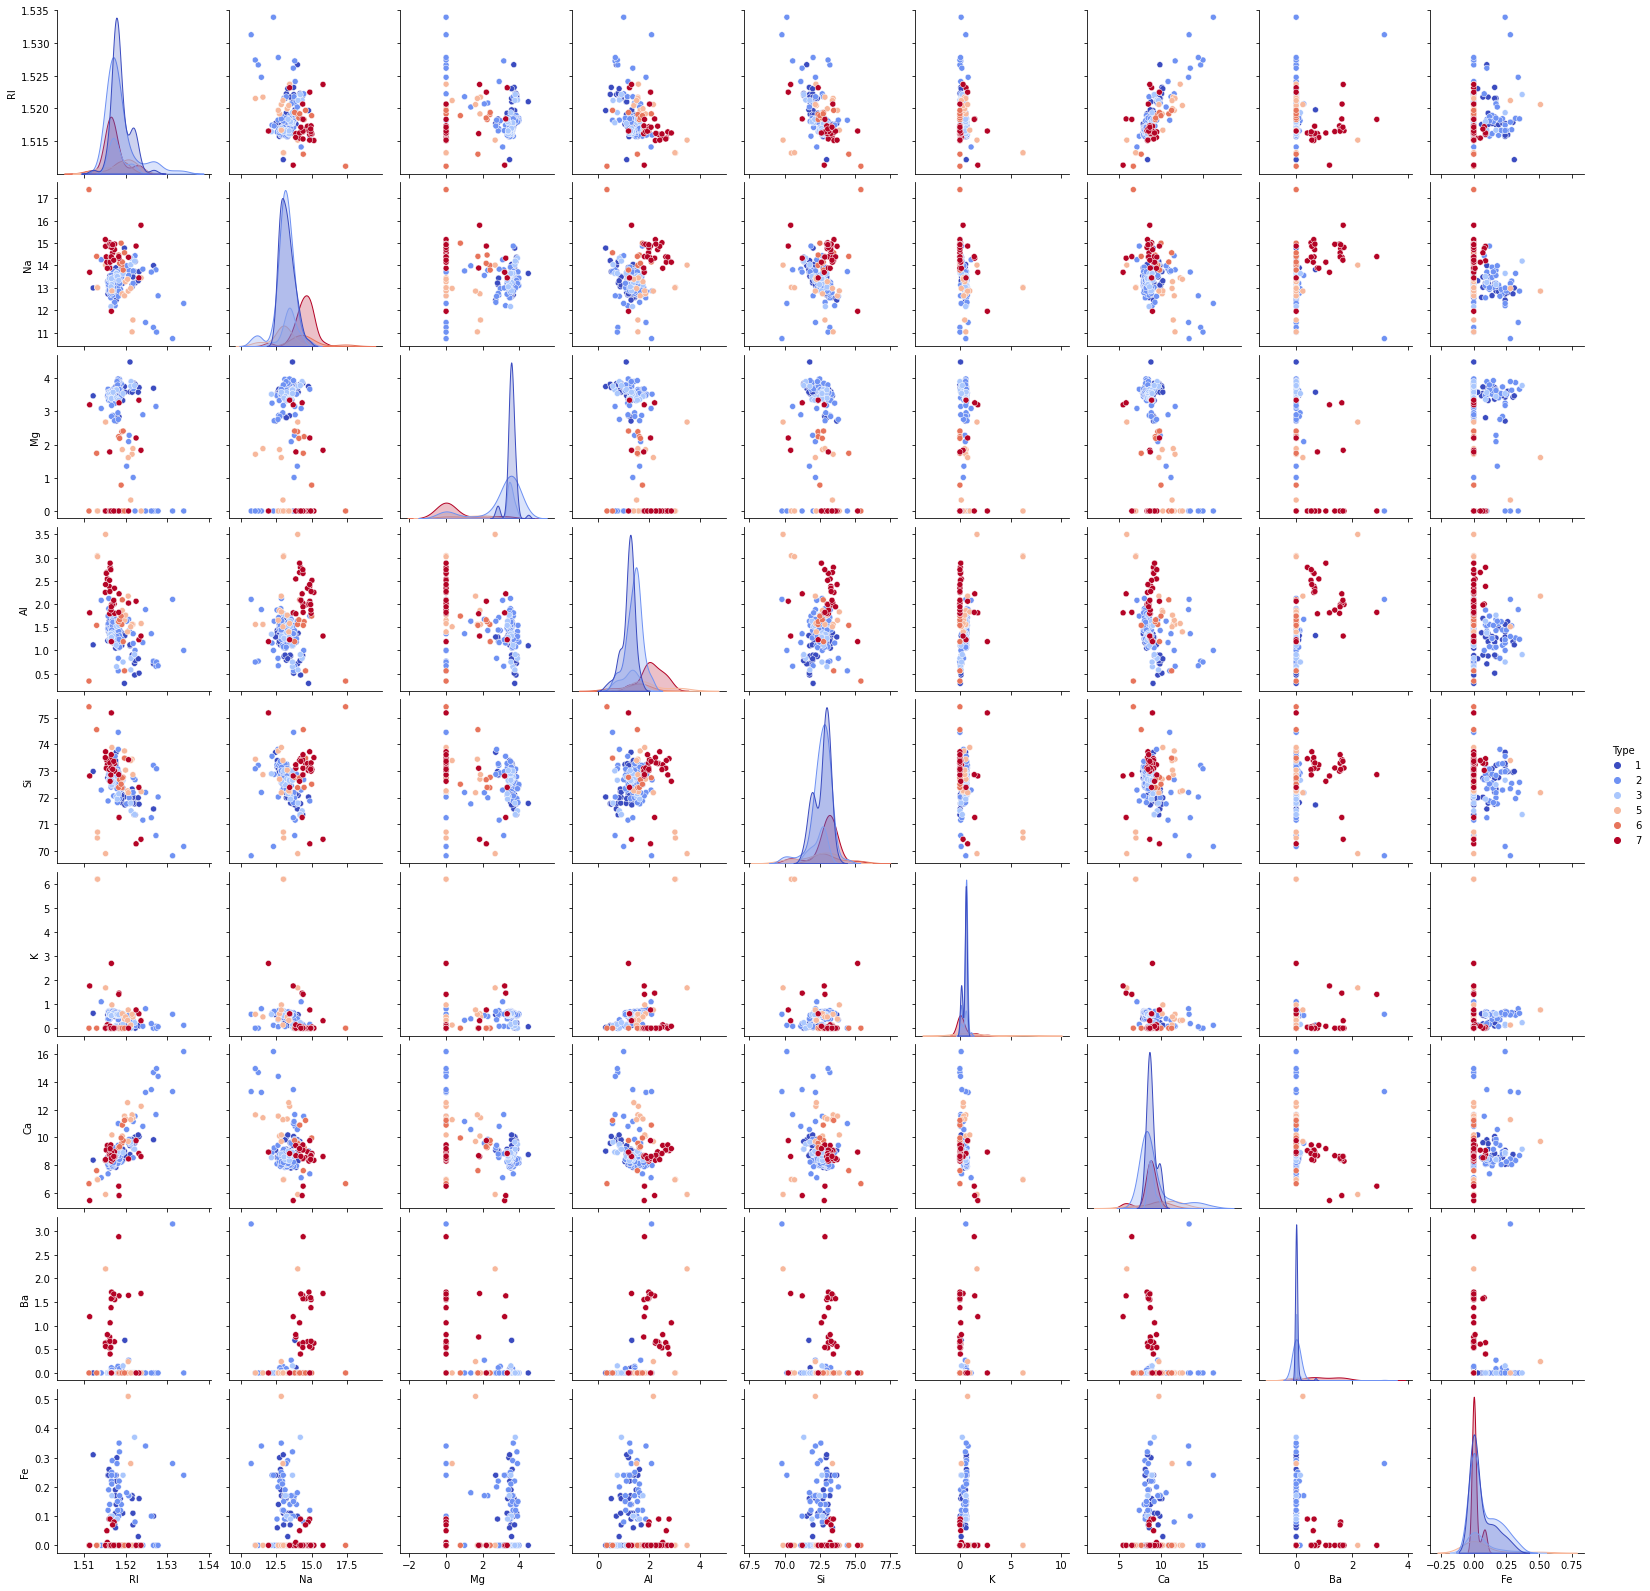

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(raw_data,hue ='Type', palette='coolwarm')
plt.show()

In [ ]:
data = raw_data.copy()

In [ ]:
X = data.drop('Type',axis=1)
Y = data[['Type']]

In [ ]:
X.shape, X.columns, Y.shape, Y.columns

((213, 9),
 Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], dtype='object'),
 (213, 1),
 Index(['Type'], dtype='object'))

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((149, 9), (64, 9), (149, 1), (64, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn_clf_1 = KNeighborsClassifier(n_neighbors=5)
knn_clf_1.fit(X_train_scaled, Y_train)
Y_pred_1 = knn_clf_1.predict(X_test_scaled)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_1))
print(confusion_matrix(Y_test, Y_pred_1))
print(classification_report(Y_test, Y_pred_1))

Accuracy: 0.671875
[[17  4  0  0  0  0]
 [ 6 16  0  1  0  0]
 [ 4  1  0  0  0  0]
 [ 0  1  0  1  0  2]
 [ 0  0  0  0  1  1]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.63      0.81      0.71        21
           2       0.70      0.70      0.70        23
           3       0.00      0.00      0.00         5
           5       0.50      0.25      0.33         4
           6       1.00      0.50      0.67         2
           7       0.73      0.89      0.80         9

    accuracy                           0.67        64
   macro avg       0.59      0.52      0.53        64
weighted avg       0.62      0.67      0.64        64



In [ ]:
from sklearn import preprocessing

norm = preprocessing.MinMaxScaler()
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)

In [ ]:
knn_clf_2 = KNeighborsClassifier(n_neighbors=5)
knn_clf_2.fit(X_train_norm, Y_train)
Y_pred_2 = knn_clf_2.predict(X_test_norm)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_2))
print(confusion_matrix(Y_test, Y_pred_2))
print(classification_report(Y_test, Y_pred_2))

Accuracy: 0.734375
[[17  4  0  0  0  0]
 [ 4 18  0  1  0  0]
 [ 3  1  1  0  0  0]
 [ 0  1  0  1  0  2]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  8]]
              precision    recall  f1-score   support

           1       0.71      0.81      0.76        21
           2       0.72      0.78      0.75        23
           3       1.00      0.20      0.33         5
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         2
           7       0.80      0.89      0.84         9

    accuracy                           0.73        64
   macro avg       0.79      0.66      0.67        64
weighted avg       0.74      0.73      0.71        64



In [ ]:
from sklearn.model_selection import GridSearchCV

knn_clf_3 = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  

grid_3 = GridSearchCV(knn_clf_3, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_3=grid_3.fit(X_train_scaled, Y_train)

print(grid_search_3.best_params_)
accuracy = grid_search_3.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 71.19%


In [ ]:
knn_clf_4 = KNeighborsClassifier(n_neighbors=1)
knn_clf_4.fit(X_train_scaled, Y_train)
Y_pred_4 = knn_clf_4.predict(X_test_scaled)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_4))
print(confusion_matrix(Y_test, Y_pred_4))
print(classification_report(Y_test, Y_pred_4))

Accuracy: 0.765625
[[16  5  0  0  0  0]
 [ 1 19  1  1  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  2  0  2]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.80      0.76      0.78        21
           2       0.79      0.83      0.81        23
           3       0.67      0.40      0.50         5
           5       0.67      0.50      0.57         4
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         9

    accuracy                           0.77        64
   macro avg       0.70      0.66      0.67        64
weighted avg       0.76      0.77      0.76        64



In [ ]:
knn_clf_5 = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  

grid_5 = GridSearchCV(knn_clf_3, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search_5=grid_5.fit(X_train_norm, Y_train)

print(grid_search_5.best_params_)
accuracy = grid_search_5.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 1}
Accuracy for our training dataset with tuning is : 71.24%


In [ ]:
knn_clf_6 = KNeighborsClassifier(n_neighbors=1)
knn_clf_6.fit(X_train_norm, Y_train)
Y_pred_6 = knn_clf_6.predict(X_test_norm)

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred_6))
print(confusion_matrix(Y_test, Y_pred_6))
print(classification_report(Y_test, Y_pred_6))

Accuracy: 0.734375
[[14  7  0  0  0  0]
 [ 1 19  1  1  1  0]
 [ 3  0  2  0  0  0]
 [ 0  0  0  2  0  2]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  9]]
              precision    recall  f1-score   support

           1       0.78      0.67      0.72        21
           2       0.73      0.83      0.78        23
           3       0.67      0.40      0.50         5
           5       0.67      0.50      0.57         4
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         9

    accuracy                           0.73        64
   macro avg       0.68      0.65      0.65        64
weighted avg       0.73      0.73      0.73        64

